In [14]:
source(file = "R/merge-decision.R")

library(doMC)
registerDoMC(num.processes)

In [3]:
# Loading data files
all <- load.data_new()

In [223]:
nrow(all)/4

[1] 229016.2

In [4]:
## Function for running regressions
run.mergedecision.classifiers <- function(df, cases = c(1000, 10000,
                                                        floor(nrow(df)/4),
                                                        floor(nrow(df)/2),
                                                        nrow(df)),
                                          suffix = "")
{
  for (i in cases) {
    cvResult <- cross.validation(merge.decision.model,
                                 run.classifiers.mergedecision,
                                 prepare.data.mergedecision, df, i, 10)

   printf("Outputing Restuls")

    write.csv(cvResult, file = sprintf("merge-decision-2-cv-%d%s.csv", i, suffix))
    cross.validation.plot(cvResult,
                          sprintf("Merge decision task cross validation (%d items)", i),
                          sprintf("merge-decision-2-cv-%d%s.pdf", i, suffix))
  }
}



# Running regression


In [15]:
# Running regression
run.mergedecision.classifiers(all)

ERROR: Error in {: task 1 failed - "incorrect number of dimensions"


## Redefine the merge decision model with the dominant characteristics and rerun


[1] "Running cross.val num_samples: 1000, run: 1"
[1] "Prior propability: 0.840000"


Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


Call:
 randomForest(formula = model, data = train.set, importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.1437848
                    % Var explained: -6.98
                           %IncMSE IncNodePurity
sloc                      4.795316      33.19483
test_lines_per_kloc      10.343259      30.72307
commits_on_files_touched -0.395108      22.92261


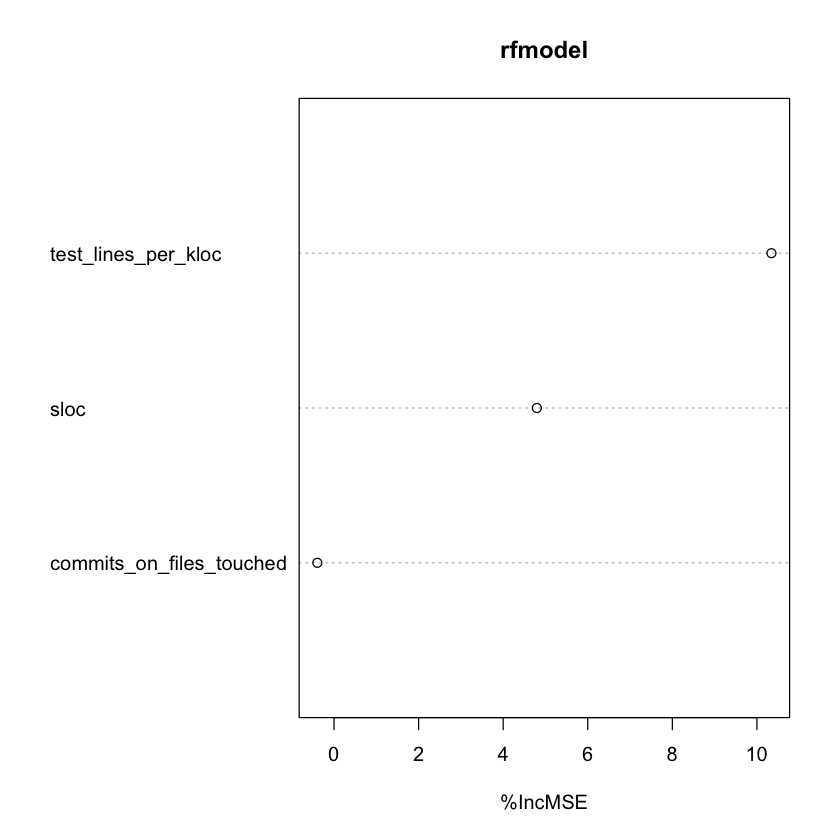

ERROR: Error in predict.randomForest(rfmodel, test, type = "prob"): 'prob' or 'vote' not meaningful for regression


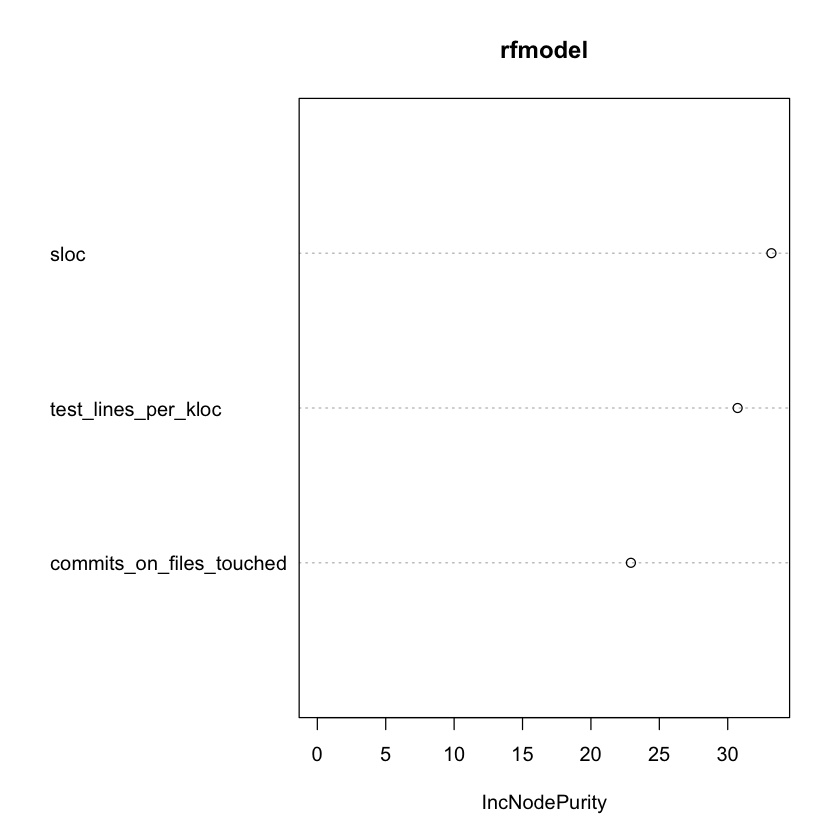

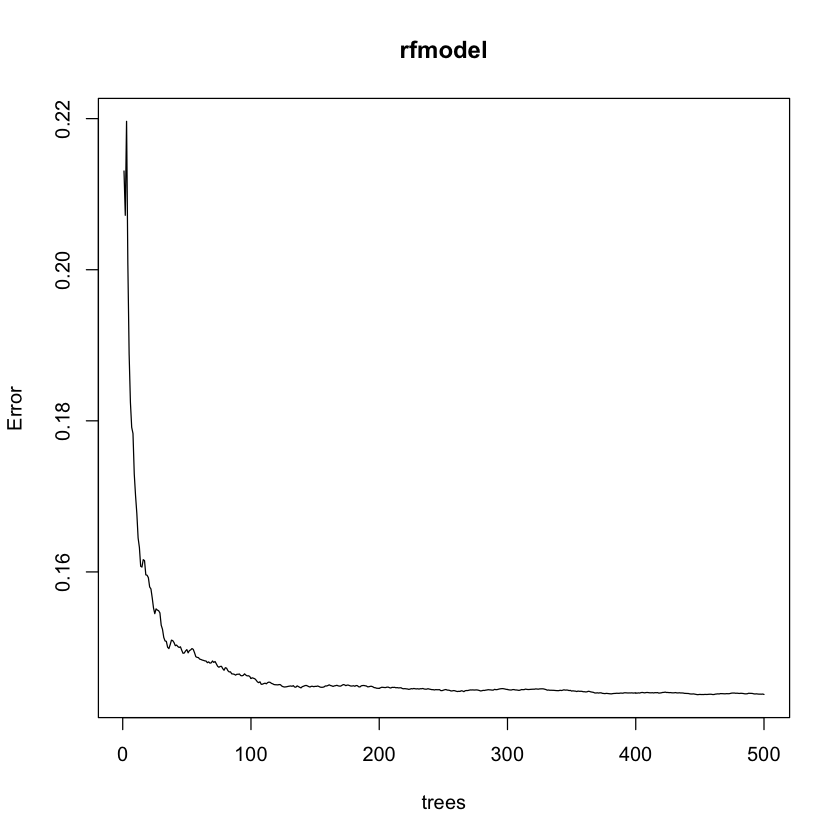

In [67]:
# Redefine the merge decision model with the dominant characteristics and rerun
merge.decision.model = merged ~ sloc + test_lines_per_kloc + commits_on_files_touched
run.mergedecision.classifiers(all, suffix = "-dominant")

# SCRAP

In [158]:
model <- merged ~ team_size + num_commits + files_changed +
  perc_external_contribs + sloc + src_churn + test_churn + num_comments +
  commits_on_files_touched +  test_lines_per_kloc + prev_pullreqs +
  requester_succ_rate + main_team_member + conflict + forward_links

In [179]:
sampleddata <- prepare.data.mergedecision(all, 100)


NULL

In [187]:
train <- na.omit(sampleddata$train)
test <- na.omit(sampleddata$test)

## Random Forest Regression

[1] "Training"


Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”


Call:
 randomForest(formula = model, data = train.set, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 0.1838392
                    % Var explained: -10.39
                             %IncMSE IncNodePurity
team_size                -0.08944050    1.19050832
num_commits               3.85385609    0.46538841
files_changed             2.32325076    0.63097772
perc_external_contribs    3.40606354    2.02712560
sloc                      3.22832506    1.74683735
src_churn                 0.58004240    1.22675483
test_churn               -0.27634219    0.26741130
num_comments             -0.66398748    0.58853174
commits_on_files_touched  4.15878601    1.69603175
test_lines_per_kloc      -4.31790795    1.40552518
prev_pullreqs             3.35321030    0.85900118
requester_succ_rate       2.53102098    0.79180537
main_team_member          0.53018743  

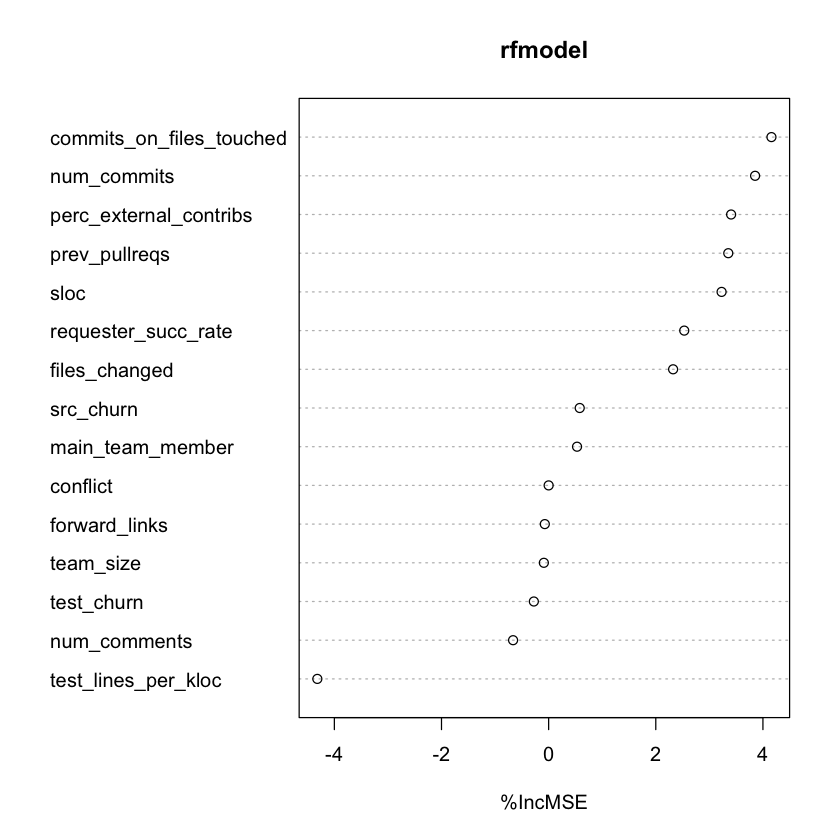

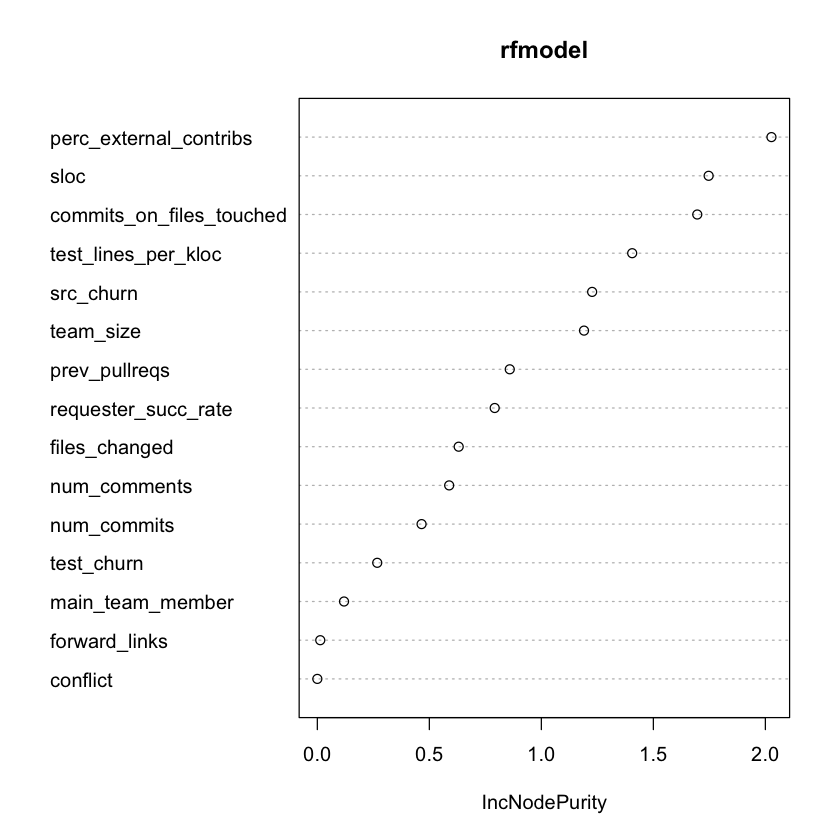

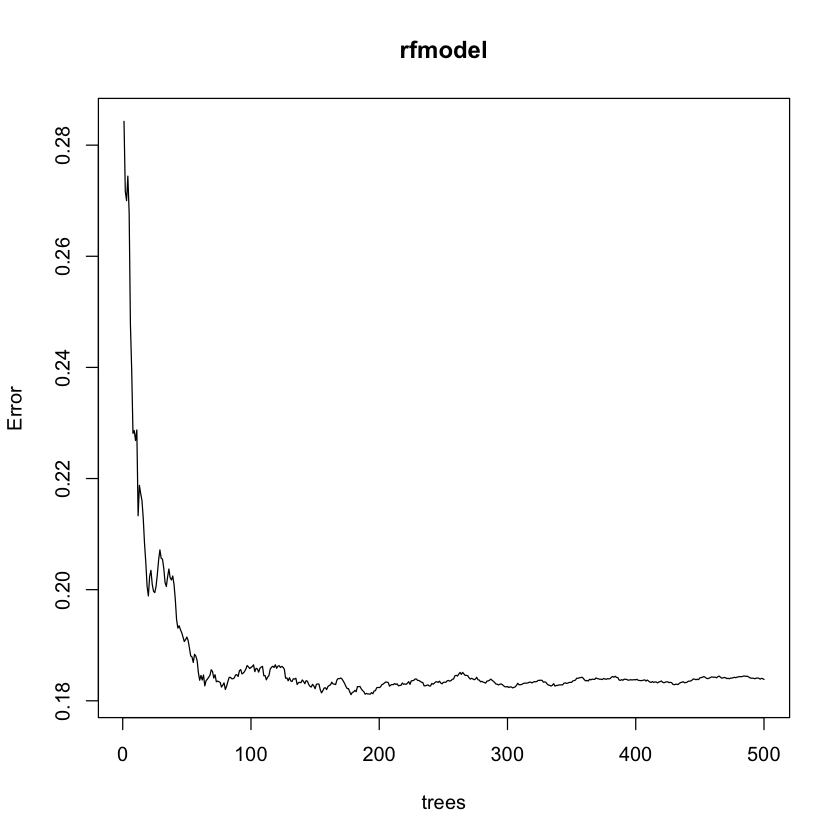

In [188]:
print("Training")
rfmodel <- rf.train(model, train)

In [189]:
print("Preditcing")
predictions <- predict(rfmodel, test)

[1] "Preditcing"


In [209]:
pred.obj <- prediction(predictions, as.numeric(test$merged))

In [205]:
metrics <- classification.perf.metrics("randomforest", pred.obj)

[1] "randomforest: AUC 0.444444, ACC 0.500000, PREC 0.894444, REC 0.444444"


In [207]:
performance(pred.obj, "acc")

An object of class "performance"
Slot "x.name":
[1] "Cutoff"

Slot "y.name":
[1] "Accuracy"

Slot "alpha.name":
[1] "none"

Slot "x.values":
[[1]]
 [1]       Inf 0.9953333 0.9872667 0.9837667 0.9673667 0.9557667 0.9363333
 [8] 0.9281333 0.9112000 0.8992333 0.6764000


Slot "y.values":
[[1]]
 [1] 0.1 0.2 0.3 0.4 0.5 0.4 0.5 0.6 0.7 0.8 0.9


Slot "alpha.values":
list()


In [210]:
performance(pred.obj, "prec", "rec")

An object of class "performance"
Slot "x.name":
[1] "Recall"

Slot "y.name":
[1] "Precision"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
 [1] 0.0000000 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667
 [8] 0.7777778 0.8888889 1.0000000 1.0000000


Slot "y.values":
[[1]]
 [1] NaN 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.9


Slot "alpha.values":
[[1]]
 [1]       Inf 0.9646000 0.8809667 0.8746667 0.8737000 0.8729667 0.8693000
 [8] 0.6995667 0.6012333 0.5616333 0.4104000



In [196]:
test$merged

[1]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE

In [208]:
predictions

307736    773660    294334    427943    568911     93505    513699    579104 
0.5616333 0.9646000 0.8737000 0.8809667 0.6995667 0.4104000 0.8729667 0.8693000 
   564100    373410 
0.8746667 0.6012333

In [153]:
testPred <- c(TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE)

In [172]:
testPred2 <- c(
0.987266666666667
,
0.9112
,
0.6764
,
0.967366666666667
,
0.928133333333333
,
0.955766666666667
,
0.995333333333333
,
0.983766666666667
,
0.936333333333333,0.899233333333333)

In [201]:
testPred2

[1] 0.9872667 0.9112000 0.6764000 0.9673667 0.9281333 0.9557667 0.9953333
 [8] 0.9837667 0.9363333 0.8992333

## Binary Logistic Regresion

In [218]:
model <- merged ~ team_size + num_commits + files_changed +
  perc_external_contribs + sloc + src_churn + test_churn + num_comments +
  commits_on_files_touched +  test_lines_per_kloc + prev_pullreqs +
  requester_succ_rate + main_team_member + conflict + forward_links

In [219]:
logmodel <- binlog.train(model, train)

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [212]:
## remove incomplete cases
dat <- na.omit(train)
## extract factor columns and drop redundant levels
fctr <- lapply(dat[sapply(dat, is.factor)], droplevels)
## count levels
sapply(fctr, nlevels)

merged_using         conflict    forward_links        requester 
               4                1                2               90 
    intra_branch main_team_member 
               2                2

In [220]:
  binlog <- glm(model, data=train);
  print(summary(binlog))

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [197]:
data(ROCR.simple)

In [198]:
pred <- prediction( ROCR.simple$predictions, ROCR.simple$labels )

In [199]:
ROCR.simple$predictions

[1] 0.612547843 0.364270971 0.432136142 0.140291078 0.384895941 0.244415489
  [7] 0.970641299 0.890172812 0.781781371 0.868751832 0.716680598 0.360168796
 [13] 0.547983407 0.385240464 0.423739359 0.101699993 0.628095575 0.744769966
 [19] 0.657732644 0.490119891 0.072369921 0.172741714 0.105722115 0.890078186
 [25] 0.945548941 0.984667270 0.360180429 0.448687336 0.014823599 0.543533783
 [31] 0.292368449 0.701561487 0.715459280 0.714985914 0.120604738 0.319672178
 [37] 0.911723615 0.757325590 0.090988280 0.529402244 0.257402979 0.589909284
 [43] 0.708412104 0.326672910 0.086546283 0.879459891 0.362693564 0.230157183
 [49] 0.779771989 0.876086217 0.353281048 0.212014560 0.703293499 0.689075677
 [55] 0.627012496 0.240911145 0.402801992 0.134794140 0.120473353 0.665444679
 [61] 0.536339509 0.623494622 0.885179651 0.353777439 0.408939895 0.265686095
 [67] 0.932159806 0.248500489 0.858876675 0.491735594 0.151350957 0.694457482
 [73] 0.496513160 0.123504905 0.499788081 0.310718619 0.907651100 0.340078180
 [79] 0.195097957 0.371936985 0.517308606 0.419560072 0.865639036 0.018527600
 [85] 0.539086009 0.005422562 0.772728821 0.703885141 0.348213542 0.277656869
 [91] 0.458674210 0.059045866 0.133257805 0.083685883 0.531958184 0.429650397
 [97] 0.717845453 0.537091350 0.212404891 0.930846938 0.083048377 0.468610247
[103] 0.393378108 0.663367560 0.349540913 0.194398425 0.844415442 0.959417835
[109] 0.211378771 0.943432189 0.598162949 0.834803976 0.576836208 0.380396459
[115] 0.161874325 0.912325837 0.642933593 0.392173971 0.122284044 0.586857799
[121] 0.180631658 0.085993218 0.700501359 0.060413627 0.531464015 0.084254795
[127] 0.448484671 0.938583020 0.531006532 0.785213140 0.905121019 0.748438143
[133] 0.605235403 0.842974300 0.835981859 0.364288579 0.492596896 0.488179708
[139] 0.259278968 0.991096434 0.757364019 0.288258273 0.773336236 0.040906997
[145] 0.110241034 0.760726142 0.984599159 0.253271061 0.697235328 0.620501132
[151] 0.814586047 0.300973098 0.378092079 0.016694412 0.698826511 0.658692553
[157] 0.470206008 0.501489336 0.239143340 0.050999138 0.088450984 0.107031842
[163] 0.746588080 0.480100183 0.336592126 0.579511087 0.118555284 0.233160827
[169] 0.461150807 0.370549294 0.770178504 0.537336015 0.463227453 0.790240205
[175] 0.883431431 0.745110673 0.007746305 0.012653524 0.868331219 0.439399995
[181] 0.540221346 0.567043171 0.035815400 0.806543942 0.248707470 0.696702150
[187] 0.081439129 0.336315317 0.126480399 0.636728451 0.030235062 0.268138293
[193] 0.983494405 0.728536415 0.739554341 0.522384507 0.858970526 0.383807972
[199] 0.606960209 0.138387070

In [200]:
ROCR.simple$labels 

[1] 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1
 [38] 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0
 [75] 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1
[112] 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1
[149] 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0
[186] 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0

In [13]:
data.frame(classifier = rep(NA, 3), auc = rep(0, 3), acc = rep(0,3),
                       prec = rep(0, 3), rec = rep(0, 3), stringsAsFactors=FALSE)

classifier,auc,acc,prec,rec
NA,0,0,0,0
NA,0,0,0,0
NA,0,0,0,0


In [12]:
sampleddata$test

,mergetime_minutes,merged_using,conflict,forward_links,team_size,num_commits,num_comments,files_changed,perc_external_contribs,sloc,⋯,test_cases_per_kloc,asserts_per_kloc,stars,requester,prev_pullreqs,requester_succ_rate,followers,intra_branch,main_team_member,merged
140549,25,github,false,false,33,1,0,2,0.2326007,36028,⋯,24.5364716,75.3858110,414,nouiz,197,0.9746193,32,false,true,TRUE
496496,1,github,false,false,9,1,1,1,0.7777778,437,⋯,22.8832952,485.1258581,7,zzen,2,1.0000000,46,false,false,TRUE
897042,0,github,false,false,12,2,0,40,0.4447761,179527,⋯,0.1893866,0.3007904,1,sagara-gunathunga,0,0.0000000,1,true,true,TRUE
326567,119,github,false,false,29,1,0,1,0.3775510,13518,⋯,1.7754106,13.1676283,2240,nikicat,0,0.0000000,20,false,false,TRUE
557486,9117,commits_in_master,false,false,5,1,4,4,0.6594203,998,⋯,0.0000000,333.6673347,1,vladikoff,19,1.0000000,574,false,true,TRUE
101525,24,github,false,false,2,1,0,4,0.7647059,475,⋯,0.0000000,157.8947368,765,azakus,7,1.0000000,222,true,true,TRUE
688113,92,commits_in_master,false,false,10,1,1,1,0.1082750,10239,⋯,143.5687079,276.5895107,44,kivattik,15,0.8666667,2,true,true,TRUE
276815,34,commits_in_master,false,false,7,1,3,1,0.2203390,15436,⋯,22.7390516,55.1956465,18,tmtmtmtm,9,1.0000000,45,true,true,TRUE
462150,25,commits_in_master,false,false,5,2,3,1,0.7014925,8908,⋯,0.3367759,0.4490346,44,haliphax,53,0.8867925,12,false,true,TRUE
412082,146902,merged_in_comments,false,true,10,2,1,8,0.6500000,5833,⋯,38.0593177,132.1789817,567,MichaelAllenMiller,0,0.0000000,4,false,false,TRUE


In [40]:
subset(sampleddata$train, select=c("merged", "forward_links"))

ERROR: Error in `[.data.frame`(x, r, vars, drop = drop): undefined columns selected


In [47]:
ncol(all)

[1] 76

In [62]:
subset(all, select=c('lifetime_minutes', 'mergetime_minutes', 'merged_using', 'conflict',
       'forward_links', 'team_size', 'num_commits', 'num_comments',
       'files_changed', 'perc_external_contribs', 'sloc', 'src_churn',
       'test_churn', 'commits_on_files_touched', 'test_lines_per_kloc',
       'test_cases_per_kloc', 'asserts_per_kloc', 'stars', 'requester',
       'prev_pullreqs', 'requester_succ_rate', 'followers', 'intra_branch',
       'main_team_member', 'merged'))

lifetime_minutes,mergetime_minutes,merged_using,conflict,forward_links,team_size,num_commits,num_comments,files_changed,perc_external_contribs,⋯,test_cases_per_kloc,asserts_per_kloc,stars,requester,prev_pullreqs,requester_succ_rate,followers,intra_branch,main_team_member,merged
125,125,commits_in_master,false,false,2,4,0,6,0.1872510,⋯,0.0000000,0.0000000,9,0xc0170,19,0.9473684,43,true,true,TRUE
0,0,commits_in_master,false,false,2,1,0,1,0.1821862,⋯,0.0000000,0.0000000,9,0xc0170,18,0.9444444,43,true,true,TRUE
4517,4517,commits_in_master,false,false,2,2,2,1,0.1762295,⋯,0.0000000,0.0000000,9,0xc0170,17,0.9411765,43,true,true,TRUE
1,1,commits_in_master,false,false,2,1,0,1,0.1645570,⋯,0.0000000,0.0000000,9,0xc0170,16,0.9375000,43,true,true,TRUE
1769,NA,unknown,false,false,2,3,4,2,0.1659574,⋯,0.0000000,0.0000000,9,0xc0170,15,1.0000000,43,true,true,FALSE
1281,1281,commits_in_master,false,false,2,3,1,3,0.1608696,⋯,0.0000000,0.0000000,9,0xc0170,14,1.0000000,42,true,true,TRUE
2312,2312,commits_in_master,false,false,2,1,0,4,0.1615721,⋯,0.0000000,0.0000000,9,0xc0170,13,1.0000000,42,true,true,TRUE
23,23,commits_in_master,false,false,2,1,0,4,0.1396396,⋯,0.0000000,0.0000000,9,0xc0170,12,1.0000000,42,true,true,TRUE
976,976,commits_in_master,false,false,2,1,0,2,0.1363636,⋯,0.0000000,0.0000000,9,sg-,8,0.8750000,15,false,false,TRUE
31,31,commits_in_master,false,false,2,1,0,1,0.1330275,⋯,0.0000000,0.0000000,9,sg-,7,0.8571429,15,false,false,TRUE


In [61]:
subset(all, select=c('stars'))

stars
9
9
9
9
9
9
9
9
9
9
